In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import pandas as pd
from tqdm import tqdm

In [2]:
df = pd.read_csv('pbjam/data/prior_data.csv')[1:4]

In [3]:
# Initialize a jam session with a list of stars:
jam_sess = session(dictlike = df, nthreads=1, use_cached=True)

100%|██████████| 3/3 [04:10<00:00, 74.76s/it]


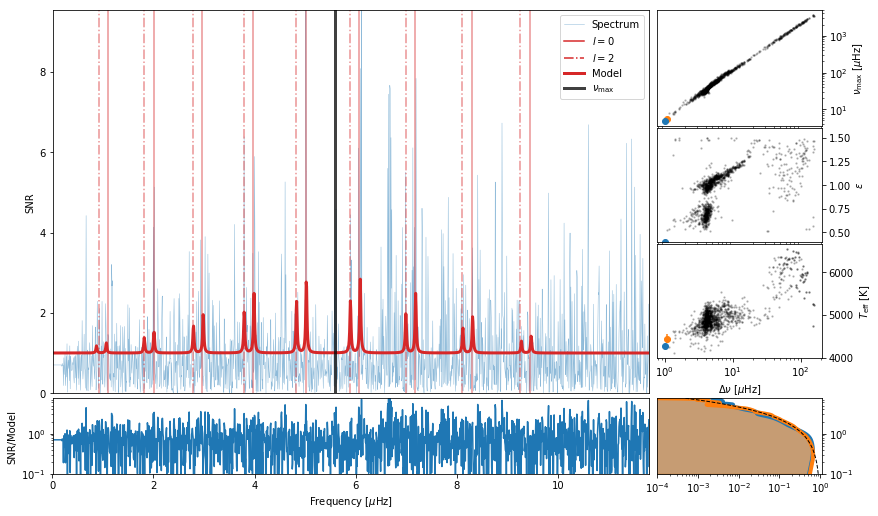

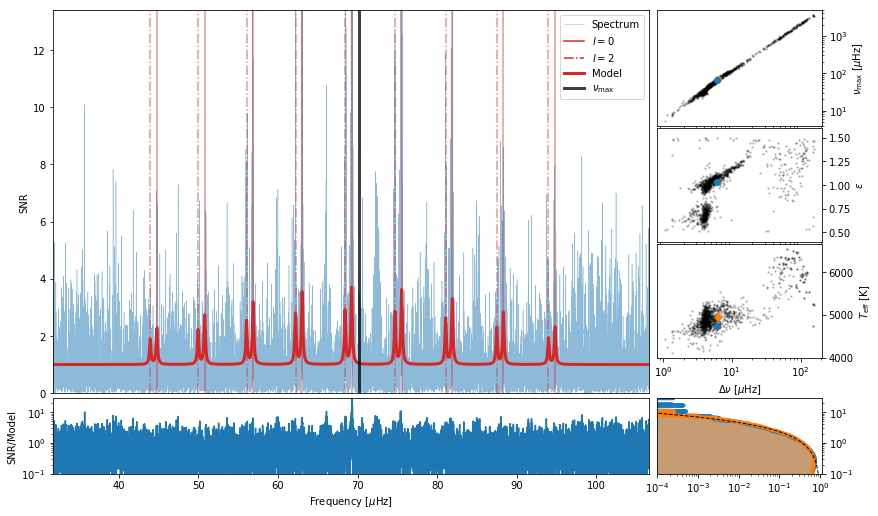

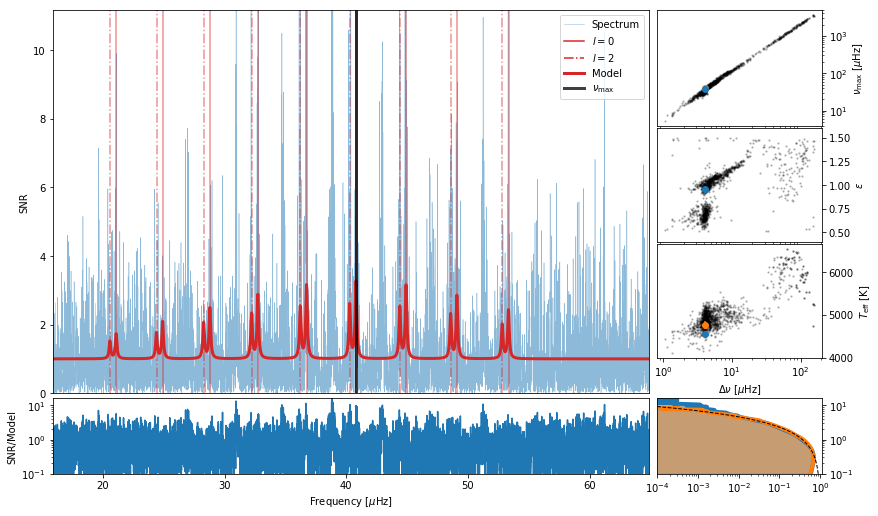

In [4]:
jam_sess(norders = 9)

In [5]:
jam_sess.record(path = '/home/nielsemb/work/repos/PBjam')